In [45]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Fashion MNIST dataset - 28x28 greyscale images. 60,000 images for training. 10,000 for testing. 10 classes
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalise pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['t-shirt', 'trouser', 'jumper', 'dress', 'coat',
               'sandal', 'shirt', 'trainer', 'bag', 'boot']

print('Train images: {}\tTrain lables: {}'.format(train_images.shape, len(train_labels)))
print('Test images: {}\tTest lables: {}'.format(test_images.shape, len(test_labels)))

Train images: (60000, 28, 28)	Train lables: 60000
Test images: (10000, 28, 28)	Test lables: 10000


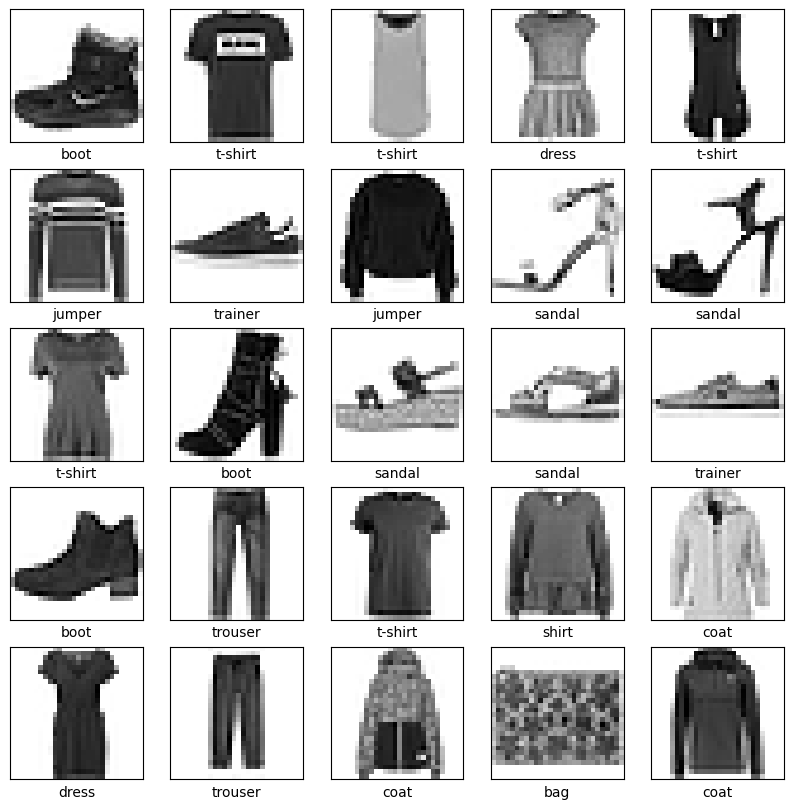

In [41]:
# Verify the data by plotting the first few images in the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [43]:
# Build the neural network, specifying each of the layers
model = tf.keras.Sequential([
    # Flatten transforms the images from a 28 x 28 array down to a one-dimensional array.
    # This layer has no parameters to learn. Only formats data.
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Densely connected (fully connected) neural network layers
    tf.keras.layers.Dense(128, activation='relu'),
    # A layer of 10 neurons (a logits array) representing the output of the network
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', # Backpropagation (algorithm for gradient descent)
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Loss function
              metrics=['accuracy']) # Fraction of images correctly classified

In [30]:
# Train the network
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4992 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3777 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3373 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3143 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2940 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2818 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2663 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2497 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [31]:
# Test the network on unseen data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3349 - accuracy: 0.8844 - 346ms/epoch - 1ms/step


In [32]:
# The gap between training accuracy and test accuracy represents overfitting. Overfitting happens
# when a machine learning model performs worse on new, previously unseen inputs than it does on
# the training data. An overfitted model "memorizes" the noise and details in the training dataset
# to a point where it negatively impacts the performance of the model on the new data.

In [33]:
# Make predictions. Attach a softmax layer to convert the networks logits output to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
# Predict the label for each image in the test set
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 785us/step


In [38]:
def plot_image(predictions, label, img):
    plt.xticks([]), plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions)
    colour = 'blue' if predicted_label == label else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions),
                                         class_names[label]),
                                         color=colour)

def plot_value_array(predictions, label):
    plt.xticks(range(10)), plt.yticks([])
    plot = plt.bar(range(10), predictions, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions)

    plot[predicted_label].set_color('red')
    plot[label].set_color('blue')

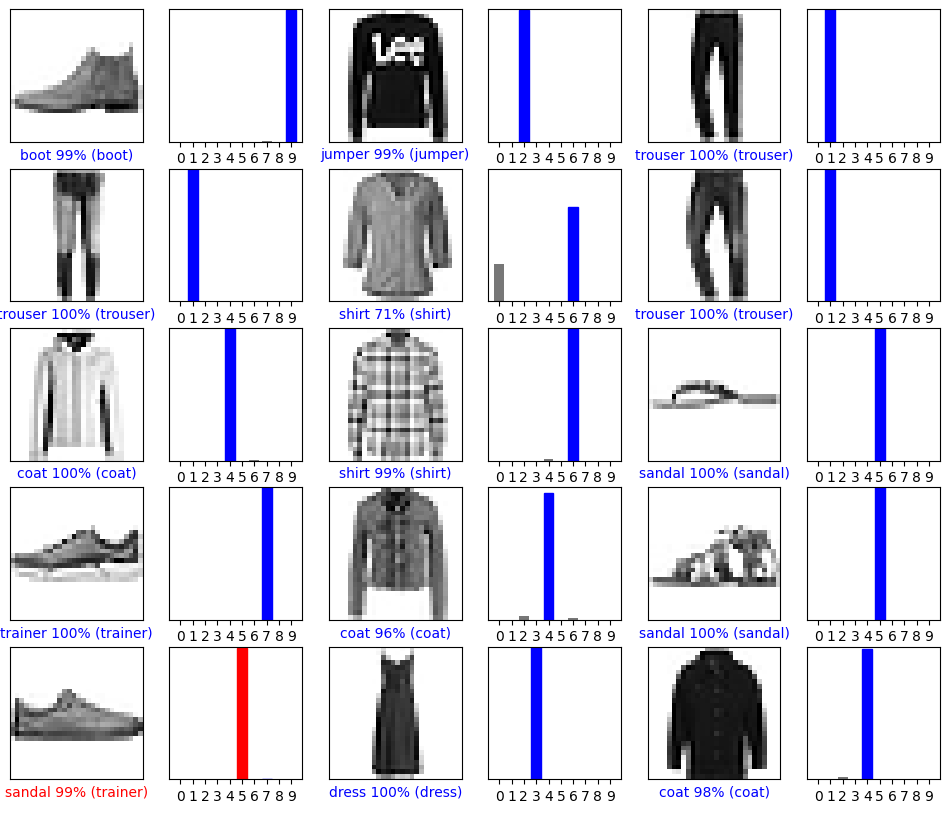

In [46]:
# Plot the first test images, their predicted labels, and the true labels
# Correct predictions are blue and incorrect predictions are red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2 * i + 1)
    plot_image(predictions[i], test_labels[i], test_images[i])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(predictions[i], test_labels[i])
plt.show()